<a href="https://colab.research.google.com/github/bulda/TensofFlow/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

w_val = [3.941323   1.437251   0.02086091] 


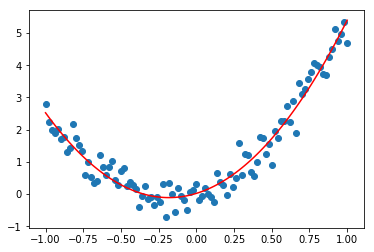

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#learning_rate = 0.01
training_epochs = 100

x_train = np.linspace(-1,1,101)
y_train = (4 * x_train**2 + 1.5*x_train + np.random.randn(*x_train.shape)*0.33)
plt.scatter(x_train, y_train)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
learning_rate = tf.placeholder(tf.float32,shape=())

def model(X,w):
    mul2 = tf.multiply(X**2,w[0])
    mul1 = tf.multiply(X,w[1])
    mul = tf.add(mul2,mul1)
    return tf.add(mul,w[2])

w = tf.Variable([0.0,0.0,0.0], name = "weights")
#b = tf.Variable(0.0, name = "bias")

y_ = model(X,w)
cost = tf.square(Y - y_)
cost_ = []
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    for epoch in range(training_epochs):
        #print(f'------ epoch {epoch} --------')
        for (x,y) in zip(x_train,y_train):
            sess.run(train_op, feed_dict = {X:x, Y:y, learning_rate: 0.005})
            #print(sess.run(cost,feed_dict = {X:x, Y:y, learning_rate: 0.005}))
            
            
            
    w_val = sess.run(w)
    #b_val = sess.run(b)

print(f'w_val = {w_val} ')

y_learned = w_val[0]*x_train**2+x_train*w_val[1] + w_val[2]

plt.plot(x_train, y_learned,'r')
plt.show()

[ 9.23351927  0.85042664  3.42783161  0.80542752  5.75287354 10.90447101]
w_val = [9.083986  1.7659185 5.124273  4.115159  4.0615845 4.4503694] 


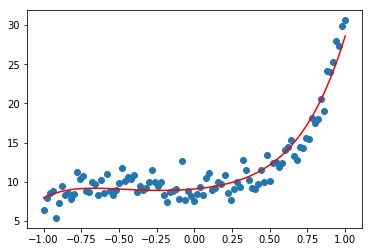

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.001
training_epochs = 100

n_pow = 6
trY_coef = np.abs(np.random.randn(n_pow)*10/2)
print(f'{trY_coef}')
trX = np.linspace(-1,1,101)
trY = 0
for i in range(n_pow):
    trY += trY_coef[i]*np.power(trX, i)
trY += np.random.randn(*trX.shape) * 1.2

plt.scatter(trX, trY)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

def model(X,w):
    terms = []
    for i in range(n_pow):
        term = tf.multiply(w[i], tf.pow(X,i))
        terms.append(term)
    return tf.add_n(terms)

w = tf.Variable([0.0]*n_pow, name = "weights")
y_ = model(X,w)
cost = tf.square(Y - y_)

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    for epoch in range(training_epochs):
        for (x,y) in zip(trX,trY):
            sess.run(train_op, feed_dict = {X:x, Y:y})
            
    w_val = sess.run(w)
    #b_val = sess.run(b)

print(f'w_val = {w_val} ')

trY_ = 0
for i in range(n_pow):
    trY_ += w_val[i]*np.power(trX,i)
    
plt.plot(trX, trY_,'r')
plt.show()

final cost = 0.20647892355918884
w_val = [-8.2018070e-02  1.9392647e-01  1.0062863e+00  1.4920337e-01
  2.6673916e-01 -1.0916449e-01 -5.3760735e-04 -2.9173139e-01
 -8.6596429e-02] 


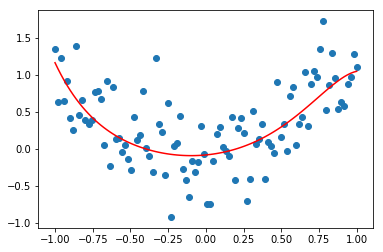

In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

learning_rate = 0.001
training_epochs = 1000
reg_lambda = 0.5

x_data = np.linspace(-1,1,100)

n_pow = 9
y_data_coefs = [0.]*n_pow
y_data_coefs[2] = 1
y_data = 0

for i in range(n_pow):
  y_data += y_data_coefs[i]*np.power(x_data,i)

y_data += np.random.randn(*x_data.shape)*0.4

(x_train, x_test, y_train, y_test) = sklearn.model_selection.train_test_split(x_data, y_data, test_size = 0.33)


plt.scatter(x_data, y_data)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

def model(X,w):
  terms = []
  for i in range(n_pow):
    term = tf.multiply(w[i], tf.pow(X, i))
    terms.append(term)
  return tf.add_n(terms)

w = tf.Variable([0.]*n_pow, name = "parameters")
y_model = model(X,w)
#cost = tf.math.divide(tf.add(tf.reduce_sum(tf.square(Y - y_model)), tf.multiply(reg_lambda,tf.reduce_sum(tf.square(w)))), 2*x_train.size)
cost = tf.reduce_mean(tf.square(Y - y_model)) 

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess:
  init = tf.global_variables_initializer()
  sess.run(init)

  for reg_lambda in np.linspace(0,1,100):
    for epoch in range(training_epochs):
      sess.run(train_op, feed_dict={X: x_train, Y: y_train})
    final_cost = sess.run(cost, feed_dict={X: x_test, Y: y_test})
  print(f'final cost = {final_cost}')

  w_val = sess.run(w)

  print(f'w_val = {w_val} ')

  trY_ = 0
  for i in range(n_pow):
    trY_ += w_val[i]*np.power(x_data,i)
  
  plt.plot(x_data, trY_,'r')
  plt.show()
